<a href="https://www.kaggle.com/code/venkatasaigudisa/this-word-can-make-your-movie-get-a-better-rating?scriptVersionId=145523155" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Using Kaggle's Rotten Tomatoes Movies and Critic Reviews Dataset, we will view the trends and relationships in the data set and conclude the **best words to include in a movie's description**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_movies.csv
/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_critic_reviews.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from array import array
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
import bisect

In [3]:
## Read in the data set and view it in its entirety
data = pd.read_csv('/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_movies.csv')
data.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [5]:
data.describe().columns

Index(['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

<AxesSubplot:xlabel='tomatometer_status'>

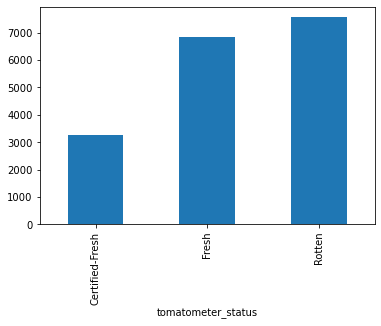

In [6]:
## Displays the frequency of statuses
data.groupby('tomatometer_status').size().plot.bar()

# **It's interesting to see that the most frequent status is Rotten (worst status)**

<AxesSubplot:xlabel='tomatometer_rating'>

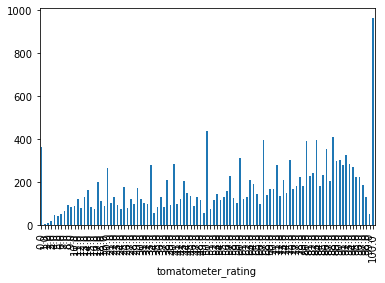

In [7]:
## Displays frequency of tomato ratings
data.groupby('tomatometer_rating').size().plot.bar()

# Another note-worthy trend is that the highest frquency is 100%(best rating); opposite to the trend we observed in the critic's graph

<AxesSubplot:xlabel='audience_rating'>

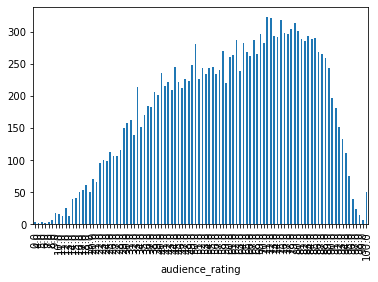

In [8]:
## Shows the frequency of audience ratings
data.groupby('audience_rating').size().plot.bar()

# This time we can see that the audience rating is more centered at about 70-80, meaning that although the critics give more 100s, the audience rates a movie higher on average

<AxesSubplot:xlabel='audience_status'>

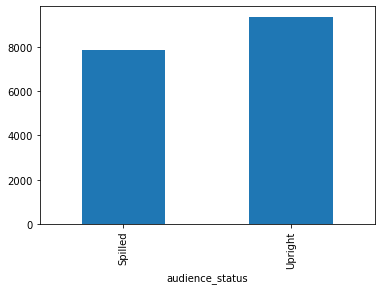

In [9]:
data.groupby('audience_status').size().plot.bar()

# Audience give better status ratings than critics

<AxesSubplot:xlabel='production_company'>

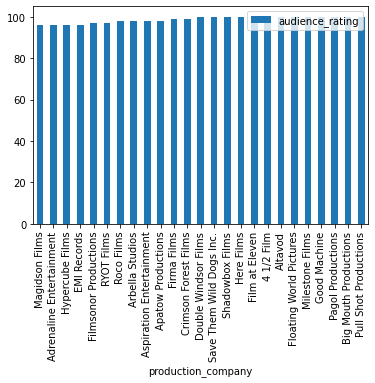

In [10]:
## Create a pivot table in order to find the top production companies
prod_company_audience_ratings = pd.pivot_table(data, index=["production_company"], values=["audience_rating"]).sort_values(by=["audience_rating"],ascending=True)
prod_company_audience_ratings.tail(25).plot.bar()

# Top 25 production companies as rated by audience

<AxesSubplot:xlabel='original_release_date'>

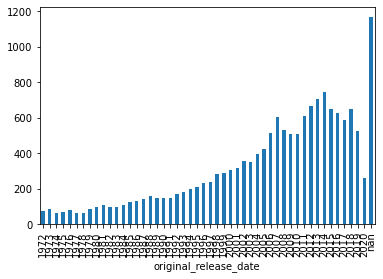

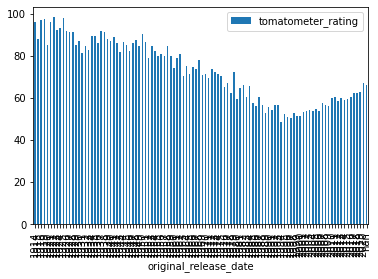

In [11]:
## Displays the frequency of releases by year from 1972 and the average tomatometer rating 
## of all movies by year from 1914
data.original_release_date = data.loc[:,'original_release_date'].apply(lambda x: str(x)[0:4])

data.groupby('original_release_date').size().tail(50).plot.bar()
pd.pivot_table(data, index=['original_release_date'], values=['tomatometer_rating']).plot.bar()

# The exponential increase in volume of movies produced and the dip in 2020 can be attributed to growth in technology and COVID-19, respectfully. However, it's surprising to see the steady drop off in critics' ratings until the 2000s

<AxesSubplot:xlabel='original_release_date'>

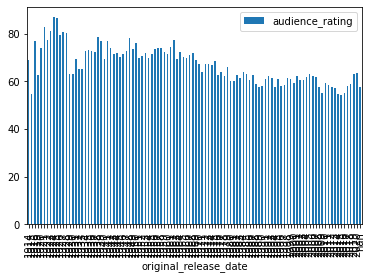

In [12]:
## Displays audience ratings (average) by year 
pd.pivot_table(data, index=['original_release_date'], values=['audience_rating']).plot.bar()

# Audience ratings, however, has been on a decline since the 30s

<AxesSubplot:xlabel='content_rating'>

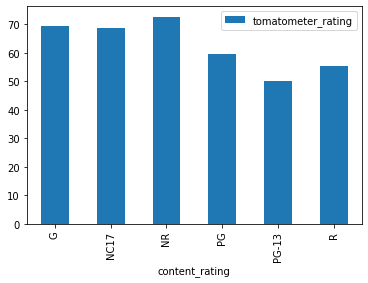

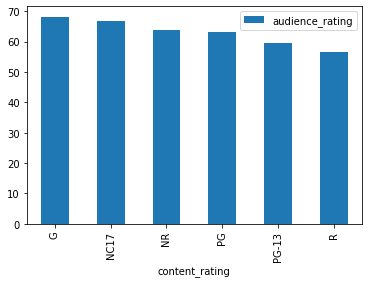

In [13]:
## Displays the critics' and audience's scores for the different content ratings
pd.pivot_table(data, index=['content_rating'], values = ['tomatometer_rating']).plot.bar()
pd.pivot_table(data, index=['content_rating'], values = ['audience_rating']).plot.bar()

# In terms of content_rating, critics seem to lean towards NR and away from PG-13 while audiences rate movies closer to G as better and closer to R as worse

<AxesSubplot:xlabel='original_release_date'>

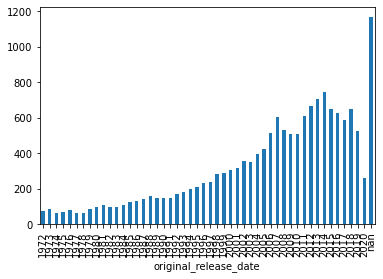

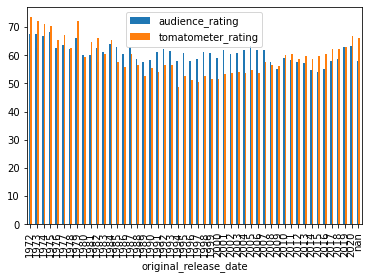

In [14]:
data.groupby('original_release_date').size().tail(50).plot.bar()
pd.pivot_table(data, index = ['original_release_date'], values = ['tomatometer_rating', 'audience_rating']).tail(50).plot.bar()

# Both the critics' ratings and audience ratings decreased as number of movies increased; The thing to note is that critics ratings fall much faster and go lower than audience ratings

<AxesSubplot:xlabel='tomatometer_rating'>

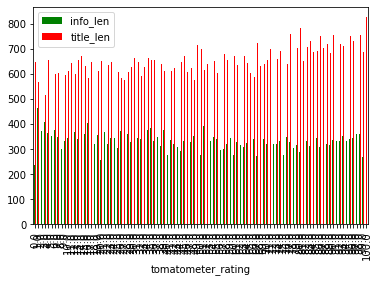

In [15]:
## Comparing the tomatometer ratings to the number of words in the movie description and title
data['title_len'] = data.loc[:,'movie_title'].apply(lambda x: len((str(x))) * 40)
data['info_len']  = data.loc[:, 'movie_info'].apply(lambda x: len((str(x))))
                                                    
colors = {'title_len': 'red', 'info_len': 'green'}

pd.pivot_table(data, index=['tomatometer_rating'], values = ['title_len', 'info_len']).plot.bar(color=colors)

# Ratings seem to go up slightly as the number of words in the information section goes up, but no such relationship when looking at words in the title

<AxesSubplot:xlabel='runtime'>

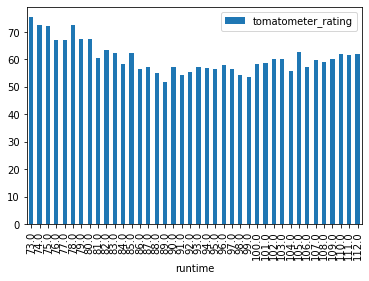

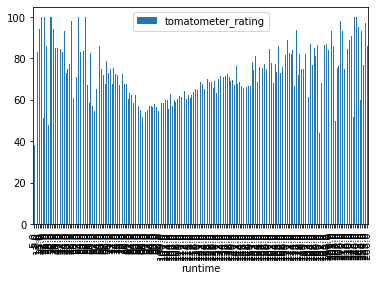

In [16]:
## Displays the relationship between runtime and tomatometer ratings on average and
## by year
data['scaled_ratings'] = data.loc[:,'tomatometer_rating'].apply(lambda x: x /100)
runtimes = pd.pivot_table(data, index=['runtime'], values = ['tomatometer_rating']).sort_values(by='runtime')
runtimes.iloc[45:85, :].plot.bar()
runtimes.plot.bar()

# Ratings take a huge dip between the late 80s and the early 90s in runtime mins but rise back up

In [17]:
## Create a list of the most frequent words found in a 100%-rated movie's information section
def mostUsedWord(words):
    words_list = words.split()
    max_count = 0
    max_word = ''
    
    for i in range(len(words_list)):
        count = 0
        for j in range(len(words_list)):
            if words_list[i] == words_list[j]:
                count += 1
        if count > max_count :
            max_count = count
            max_word = words_list[i]
    return max_word

data['most_used'] = data.loc[:, 'movie_info'].apply(lambda x: mostUsedWord(str(x)))
    

words_meter = pd.pivot_table(data, index= ['most_used'], values=['tomatometer_rating']).sort_values(by=['tomatometer_rating'])
best_words = words_meter[words_meter['tomatometer_rating'] == 100].index
best_words = best_words.sort_values()
for i in range(len(best_words)):
    print(best_words[i] + ' ')

Ackman 
Adopted 
Al 
Almost 
Along 
Antoine 
At 
Athlete 
Avid 
Bedereaux 
Biff 
Bob 
Canfield 
Childhood 
Claudia 
Comic 
Congolese 
Crowley 
Detroit 
Eddie 
Edith 
Egyptian 
Farr 
Gambling-den 
Harris 
Hickory 
Interests 
Investigative 
Jean 
Kidd 
Kitty 
Literacy 
Married 
Martin 
Multitalented 
Nishi 
Oliver 
Refugee 
Rival 
Rocky 
Shahid 
Sid 
Sister 
Surreal 
Taxidermist 
Their 
Tinker 
Trailblazing 
Troop 
Trouble 
Visionary 
black 
classic 
home 
over 
private 
them 
you 


# **Sorted list of the most frequent words used in movie descriptions whose ratings are 100%**